In [28]:
%pip install pandas numpy matplotlib seaborn scipy cvxpy openpyxl scikit-learn


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [29]:
import pandas as pd

# Load the Excel file
file_path = 'data/data-1999-2023.xlsx'

# Since the file has multiple sheets, let's list all sheet names to understand its structure
xls = pd.ExcelFile(file_path)
sheet_names = xls.sheet_names

# Display the sheet names
sheet_names

# Remove unnecessary header row and set the first row as the header
deposits_ir_df = pd.read_excel(xls, sheet_name='DEPOSITS_IR')
# deposits_ir_df = pd.read_excel(xls, sheet_name='DEPOSITS_VOL')

# Replace ".." with NaN to indicate missing values
deposits_ir_df.replace("..", pd.NA, inplace=True)

# Check the cleaned DataFrame
deposits_ir_df.head()

,Country,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,6.166667,6.2000,6.500000,6.200000,5.1000,3.100000,4.100000,4.400000,4.500000,...,2.300000,1.90000,2.000000,1.600000,1.200000,2.200000,1.300000,1.700000,1.800000,NaN
1,Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,36.572500,39.5784,47.908792,48.690833,26.1725,15.439346,13.398497,4.500329,6.756434,...,3.526964,3.31462,5.544318,6.342193,6.876657,6.415402,6.201728,7.045908,7.103587,NaN


         Country    1999      2000      2001      2002      2003   2004  \
23  Bahamas, The  4.5725  4.079167  4.245833  4.251667  3.949167  3.825   

        2005      2006      2007  ...    2014   2015      2016      2017  \
23  3.223333  3.358333  3.690833  ...  1.4175  1.405  1.241667  0.994167   

        2018      2019      2020      2021    2022  2023  
23  0.840833  0.588333  0.452292  0.521958  0.5175  0.54  

[1 rows x 26 columns]
                 Country       1999      2000      2001      2002      2003  \
12   Antigua and Barbuda   4.449548  5.177218  4.489308  4.363969  4.857001   
26                Belize   8.121667  7.694167  6.353333  6.280000  6.934167   
30              Barbados   4.400000  4.972500  4.039167  2.704167  2.563333   
76                  Fiji   3.357500  3.115000  2.685000  2.290000  1.910908   
90               Grenada   4.302760  4.235172  4.227666  3.592564  3.387018   
167            Mauritius  10.916667  9.614167  9.781667  9.875000  9.525000   
22

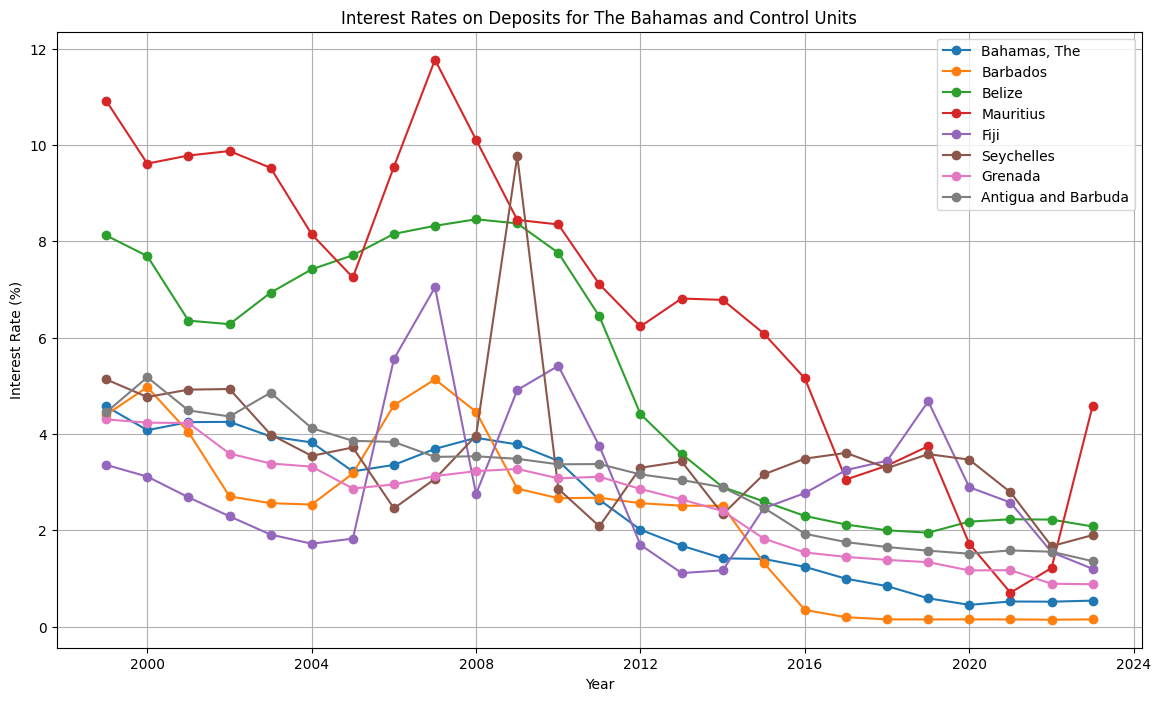

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of potential countries to analysis for checking data availability
countries = ['Bahamas, The', 'Barbados', 'Belize', 'Mauritius', 'Fiji', 'Seychelles', 'Grenada', 'Antigua and Barbuda']
# countries = ['Nigeria', 'Albania', 'Algeria', 'Angola', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Ghana', 'Kenya']

# Filter the dataset for these countries
deposits_ir_countries = deposits_ir_df[deposits_ir_df['Country'].isin(countries)]

treatment_units = ['Bahamas, The']
# treatment_units = ['Nigeria']
treatment_units_df = deposits_ir_df[deposits_ir_df['Country'].isin(treatment_units)]
print(treatment_units_df)

control_units = ['Barbados', 'Belize', 'Mauritius', 'Fiji', 'Seychelles', 'Grenada', 'Antigua and Barbuda']
# control_units = ['Barbados', 'Belize', 'Mauritius', 'Fiji', 'Seychelles']
# control_units = ['Albania', 'Algeria', 'Angola', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Ghana', 'Kenya']
control_units_df = deposits_ir_df[deposits_ir_df['Country'].isin(control_units)]
print(control_units_df)

# Pivot the DataFrame for plotting: countries as series, years as x-axis
deposits_ir_countries_pivot = deposits_ir_countries.set_index('Country').T
deposits_ir_countries_pivot.index.name = 'Year'
deposits_ir_countries_pivot.columns.name = None

# Convert index to datetime to facilitate plotting (if necessary)
deposits_ir_countries_pivot.index = pd.to_datetime(deposits_ir_countries_pivot.index, format='%Y')

# Plot the data
plt.figure(figsize=(14, 8))
for country in treatment_units + control_units:
    plt.plot(deposits_ir_countries_pivot.index, deposits_ir_countries_pivot[country], marker='o', label=country)

plt.title('Interest Rates on Deposits for The Bahamas and Control Units')
plt.xlabel('Year')
plt.ylabel('Interest Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# Correcting the approach to access the data
# It appears there was an error in how the year columns were being accessed. They should be accessed as strings.
# Let's retry accessing the pre-intervention data with the corrected column references.

# Ensure that year columns are treated as strings for both extraction and analysis
pre_intervention_years = [int(year) for year in range(1999, 2020)]
post_intervention_years = [int(year) for year in range(2020, 2024)]
# pre_intervention_years = [int(year) for year in range(2013, 2021)]
# post_intervention_years = [int(year) for year in range(2021, 2023)]

# Re-extracting pre-intervention data for The Bahamas using the corrected column names
treatment_pre_intervention = treatment_units_df.set_index('Country').loc[:, pre_intervention_years]
print(treatment_pre_intervention)

treatment_post_intervention = treatment_units_df.set_index('Country').loc[:, post_intervention_years]
print(treatment_post_intervention)

# Control units data was previously extracted correctly, but let's ensure it's correctly formatted for analysis
control_pre_intervention = control_units_df.set_index('Country').loc[:, pre_intervention_years]
print(control_pre_intervention)

control_post_intervention = control_units_df.set_index('Country').loc[:, post_intervention_years]
print(control_post_intervention)

                1999      2000      2001      2002      2003   2004      2005  \
Country                                                                         
Bahamas, The  4.5725  4.079167  4.245833  4.251667  3.949167  3.825  3.223333   

                  2006      2007      2008  ...      2010      2011      2012  \
Country                                     ...                                 
Bahamas, The  3.358333  3.690833  3.920833  ...  3.440833  2.633692  2.012083   

              2013    2014   2015      2016      2017      2018      2019  
Country                                                                    
Bahamas, The  1.68  1.4175  1.405  1.241667  0.994167  0.840833  0.588333  

[1 rows x 21 columns]
                  2020      2021    2022  2023
Country                                       
Bahamas, The  0.452292  0.521958  0.5175  0.54
                          1999      2000      2001      2002      2003  \
Country                                       

In [32]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Conducting the synthetic control analysis involves finding weights for control units
# that minimize the difference in pre-intervention interest rates between The Bahamas and the synthetic control

# Setting up a linear regression model with no intercept to estimate weights for control units
# These weights will be constrained to sum to 1 in the synthetic control construction
model = LinearRegression(fit_intercept=False, positive=True)

# The independent variables are the control units' pre-intervention data
# The dependent variable is The Bahamas' pre-intervention data
x = control_pre_intervention.T.values
y = treatment_pre_intervention.T.values
print(x)
print(y)

# Adding a constraint that the sum of weights equals 1 by adding an additional observation
x = np.vstack([x, np.ones(x.shape[1])])
y = np.append(y, 1)

# Fitting the model
model.fit(x, y)

# Extracting the weights for the control units
weights = model.coef_

# Creating a synthetic The Bahamas based on the weights obtained
synthetic_treatment_pre_intervention = np.dot(control_pre_intervention.T, weights)

# Displaying the weights for transparency
control_units_weights = pd.Series(weights, index=control_pre_intervention.index)
control_units_weights

[[ 4.44954829  8.12166667  4.4         3.3575      4.30275977 10.91666667
   5.1325    ]
 [ 5.17721846  7.69416667  4.9725      3.115       4.2351725   9.61416667
   4.7675    ]
 [ 4.48930798  6.35333333  4.03916667  2.685       4.22766637  9.78166667
   4.92083333]
 [ 4.3639695   6.28        2.70416667  2.29        3.59256384  9.875
   4.93333333]
 [ 4.85700063  6.93416667  2.56333333  1.91090832  3.3870178   9.525
   3.98916667]
 [ 4.12193447  7.41916667  2.535       1.72211713  3.32186924  8.14583333
   3.54583333]
 [ 3.85810818  7.71166667  3.18        1.82674094  2.86741577  7.25
   3.72      ]
 [ 3.83455931  8.155       4.5975      5.55728368  2.95185205  9.55
   2.45556333]
 [ 3.52392393  8.3225      5.13416667  7.04473365  3.12584593 11.77083333
   3.06859282]
 [ 3.53720156  8.4575      4.46        2.75364966  3.22884066 10.10833333
   3.96616616]
 [ 3.48357887  8.3725      2.86583333  4.91284765  3.27338     8.44583333
   9.76746401]
 [ 3.37030687  7.76083333  2.66583333  5.41

Country
Antigua and Barbuda    0.034672
Belize                 0.275741
Barbados               0.014844
Fiji                   0.000000
Grenada                0.406051
Mauritius              0.000000
Seychelles             0.000000
dtype: float64

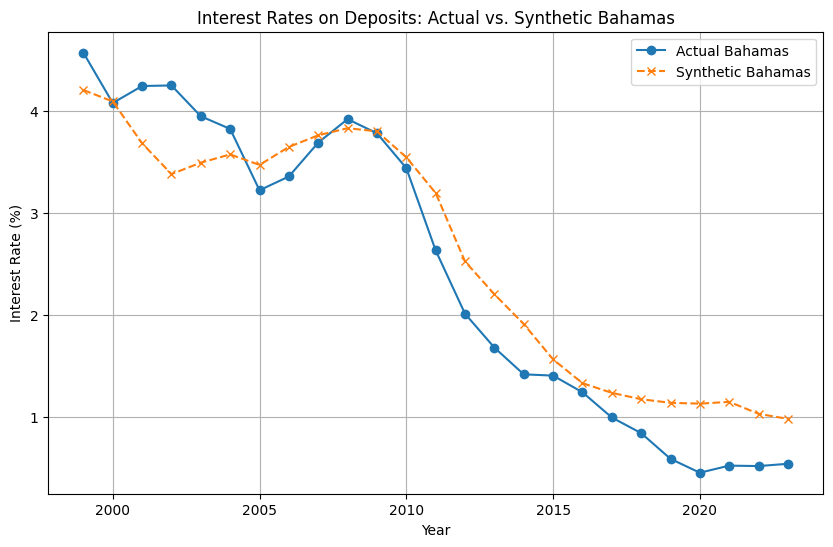

Difference between actual and synthetic post-treatment: [[-0.67765868 -0.69520806 -0.57817777 -0.52795476]
 [-0.60799201 -0.62554139 -0.5085111  -0.45828809]
 [-0.61245035 -0.62999972 -0.51296943 -0.46274643]
 [-0.58995035 -0.60749972 -0.49046943 -0.44024643]]


In [33]:
# Predict post-treatment interest rates for synthetic The Bahamas
synthetic_post_treatment = np.dot(control_post_intervention.T, weights)

# Concatenate pre and post intervention data for both actual and synthetic The Bahamas for plotting
actual_data = np.concatenate([treatment_pre_intervention.T, treatment_post_intervention.T])
synthetic_data = np.concatenate([synthetic_treatment_pre_intervention, synthetic_post_treatment])

# Time period for plotting
years = np.concatenate([pre_intervention_years, post_intervention_years])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years, actual_data, label='Actual Bahamas', marker='o')
plt.plot(years, synthetic_data, label='Synthetic Bahamas', linestyle='--', marker='x')
plt.title('Interest Rates on Deposits: Actual vs. Synthetic Bahamas')
plt.ylabel('Interest Rate (%)')
plt.xlabel('Year')
plt.legend()
plt.grid(True)
plt.show()

# Analyze the results
# Here you might calculate the mean absolute error, mean squared error, or simply discuss the observed differences
difference_post_treatment = actual_data[len(pre_intervention_years):] - synthetic_post_treatment
print("Difference between actual and synthetic post-treatment:", difference_post_treatment)

In [34]:
from sklearn.utils import shuffle

np.random.seed(42)  # For reproducibility

# Example of a simple permutation test
n_permutations = 10000
perm_diffs = []

for i in range(n_permutations):
    # Randomly shuffle the treatment labels
    shuffled_actual = shuffle(actual_data[len(pre_intervention_years):])
    perm_diff = np.mean(shuffled_actual) - np.mean(synthetic_post_treatment)
    perm_diffs.append(perm_diff)

# Calculate the p-value
obs_diff = np.mean(difference_post_treatment)
p_value = np.mean(np.abs(perm_diffs) >= np.abs(obs_diff))
print(f"P-value: {p_value}")


P-value: 1.0


A p-value of 1.0 in the context of the permutation test implies that, under the null hypothesis (which assumes there is no effect of the treatment), the observed difference in means between the actual and synthetic post-treatment data for The Bahamas is not statistically significant. In simpler terms, it suggests that the effect observed in the analysis could very likely have occurred by chance.

In permutation tests, the p-value is calculated as the proportion of times the permuted differences (differences calculated with shuffled labels, under the null hypothesis of no treatment effect) are as extreme as or more extreme than the observed difference. A p-value of 1.0 means that every permutation resulted in a difference as large as or larger than the one observed in your actual data, indicating no evidence against the null hypothesis.

No Clear Evidence of Treatment Effect: This result does not provide evidence to reject the null hypothesis. Therefore, it suggests that the introduction of the CBDC may not have had a statistically significant impact on the interest rates on deposits in The Bahamas, at least not one detectable by this test with this data.

Considerations: It's essential to consider other factors that might affect this result:

Sample Size: If the post-treatment period is short or the variations in the data are high, it might be challenging to detect a significant effect.
Choice of Test and Data: The effectiveness of the permutation test and the interpretation of the p-value depend on the appropriateness of the test for your data and hypothesis. Ensure that the assumptions of the test are met in your context.
Power of the Test: A high p-value can also result from a test that does not have enough power to detect an effect, possibly due to a small sample size or small effect size.

In [35]:
# PLACEBO TEST

# Placeholder for the actual treatment effect calculation
actual_treatment_effect = np.mean(difference_post_treatment)

# Placeholder list for storing placebo effects
placebo_effects = []

for index, control_unit in control_units_df.iterrows():
    # Exclude the current control unit to create a synthetic control
    other_controls = control_units_df[control_units_df['Country'] != control_unit['Country']]

    # Preparing the data for regression
    x = other_controls[pre_intervention_years].values.T # Control units' pre-treatment data
    y = control_unit[pre_intervention_years].values.reshape(-1, 1) # Current control unit's pre-treatment data as "treatment"

    # Add a row of ones to enforce the weights sum to 1
    x = np.vstack([x, np.ones(x.shape[1])])
    y = np.append(y, [[1]], axis=0)

    # Linear regression to find weights
    reg = LinearRegression(fit_intercept=False, positive=True)
    reg.fit(x, y)
    weights = reg.coef_[0]

    # Use weights to construct synthetic control for current control unit and calculate post-treatment effect
    synthetic_post = np.dot(weights, other_controls[post_intervention_years].values)
    actual_post = control_unit[post_intervention_years].values
    placebo_effect = np.mean(actual_post) - np.mean(synthetic_post)  # Example effect calculation

    placebo_effects.append(placebo_effect)

# Now compare the actual treatment effect to the distribution of placebo effects
# This can be done in several ways, for example, calculating the percentile rank of the actual effect in the placebo effects distribution

# Example: Assuming actual_treatment_effect is calculated correctly
placebo_effects = np.array(placebo_effects)
percentile_rank = np.mean(placebo_effects < actual_treatment_effect) * 100

print(f"Percentile rank of the actual treatment effect among placebo effects: {percentile_rank}%")

Percentile rank of the actual treatment effect among placebo effects: 28.57142857142857%


The results of the synthetic control method analysis, along with the outcomes of the permutation test and the placebo test, offer a nuanced understanding of the impact of the Central Bank Digital Currency (CBDC) introduction in The Bahamas on the interest rates on deposits. Here's how to interpret each of these components:

### Weights of Control Units

The weights assigned to each control unit in constructing the synthetic Bahamas indicate the relative importance of each control country in mimicking the pre-treatment characteristics of The Bahamas. In your model:

- **Grenada (40.6051%)** and **Belize (27.5741%)** have been assigned the highest weights, indicating that these countries' pre-treatment interest rates on deposits patterns are most similar to those of The Bahamas.
- **Antigua and Barbuda** and **Barbados** have smaller but nonzero weights, suggesting a lesser but still relevant similarity.
- **Fiji, Mauritius,** and **Seychelles** have zero weights, indicating that their pre-treatment patterns were not similar to The Bahamas or were less informative for constructing the synthetic control.

### Permutation Test: P-value of 1.0

A p-value of 1.0 from the permutation test indicates that, under the null hypothesis of no effect from introducing the CBDC, the observed difference between the actual and synthetic The Bahamas post-treatment could easily arise by chance. In simpler terms, this high p-value suggests that the introduction of the CBDC in The Bahamas did not have a statistically significant impact on the interest rates on deposits when compared to the synthetic control, as every permutation test result was at least as extreme as the observed result.

### Placebo Test: Percentile Rank of 28.57142857142857%

The percentile rank from the placebo test suggests that the actual treatment effect (the difference in post-treatment interest rates between actual The Bahamas and synthetic The Bahamas) is greater than approximately 28.57% of the placebo effects generated by artificially treating control units. This means:

- The actual effect is somewhat towards the lower end of the distribution of placebo effects, indicating that while not the lowest, the effect of the CBDC introduction in The Bahamas on deposit interest rates is less pronounced compared to a substantial number of placebo scenarios.
- This percentile rank provides modest evidence against the hypothesis that the CBDC introduction had a significant positive effect on deposit interest rates, as many of the control units, when treated as the treated unit, showed larger effects purely by chance.

### Overall Interpretation

The combination of the synthetic control method analysis results, a permutation test p-value of 1.0, and a placebo test percentile rank of 28.57% suggests that the introduction of a CBDC in The Bahamas had a limited or no discernible impact on increasing the interest rates on deposits, at least not one that is statistically significant or robust against the variability observed in control units.

These results underline the importance of considering multiple factors and employing various analytical methods when evaluating the impact of significant financial policy interventions. The lack of a significant positive effect, as indicated by these tests, could prompt further investigation into other economic indicators or longer-term effects, as well as a deeper dive into the qualitative aspects of CBDC implementation and its broader economic context.